In [123]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import pickle
import matplotlib

from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_pickle('E://bacteria_data/dataframes/full_df3.pkl')

In [3]:
df.columns

Index(['t0', 't1', 'baseline', 'dt', 'di', 'di_i', 'vel', 'baseline2', 'dt2',
       'di2', 'di_i2', 'vel2', 'args', 'i', 'i_clean', 't', 'i2', 'i_clean2',
       't2', 'voltage', 'particle', 'pore', 'run', 'date'],
      dtype='object')

In [4]:
df.particle.unique()

array(['control', 'ecoli', 'ecoli2', 'staph', 'ecoli2_treated',
       'ecoli2_untreated'], dtype=object)

In [5]:
df1 = df[df.pore=='pet2363']

In [6]:
df36 = df[df.pore=='pore36']

In [7]:
df_ecoli2_treated = df36[df36.particle=='ecoli2_treated']
df_ecoli2_untreated = df36[df36.particle=='ecoli2_untreated']

In [271]:
df_ecoli = df1[(df1.particle=='ecoli') & (df1.date=='11-30-21')&(df1.run=='1')]
df_ecoli2 = df1[(df1.particle=='ecoli2')]
df_staph = df1[df1.particle=='staph']

In [272]:
staph_conditions = [(df_staph.date=='1-19-22')&(df_staph.run=='3'),(df_staph.date=='12-17-21')&(df_staph.run=='0'),
              (df_staph.date=='12-17-21')&(df_staph.run=='2'),(df_staph.date=='12-17-21')&(df_staph.run=='3'),
             (df_staph.date=='12-17-21')&(df_staph.run=='4'),(df_staph.date=='12-17-21')&(df_staph.run=='5')]
choices = [1,-1,-1,-1,1,1]
df_staph['dir'] = np.select(staph_conditions,choices)
df_ecoli['dir'] = 1
df_ecoli2['dir'] = 1

C:\Users\codyt\AppData\Local\Temp/ipykernel_33684/1259397352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_staph['dir'] = np.select(staph_conditions,choices)
C:\Users\codyt\AppData\Local\Temp/ipykernel_33684/1259397352.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecoli['dir'] = 1
C:\Users\codyt\AppData\Local\Temp/ipykernel_33684/1259397352.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [273]:
df_ecoli2_treated['dir'] = 1
df_ecoli2_untreated['dir'] = -1

C:\Users\codyt\AppData\Local\Temp/ipykernel_33684/78961456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecoli2_treated['dir'] = 1
C:\Users\codyt\AppData\Local\Temp/ipykernel_33684/78961456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecoli2_untreated['dir'] = -1


In [274]:
df36_2 = pd.concat([df_ecoli2_untreated,df_ecoli2_treated])

In [275]:
df2 = pd.concat([df_ecoli,df_ecoli2,df_staph],ignore_index=True)

<AxesSubplot:xlabel='dt', ylabel='di_i'>

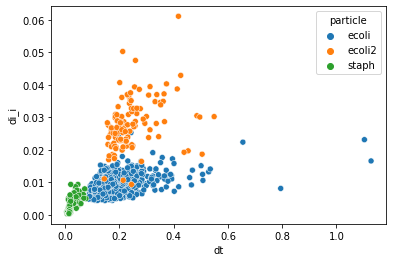

In [276]:
sns.scatterplot(data=df2,x='dt',y='di_i',hue='particle')

In [277]:
zs = df2.groupby('particle')[['dt','di_i']].transform(zscore).add_suffix('_zscore')
df2_filt = df2[(np.abs(zs['dt_zscore'])<3)&(np.abs(zs['di_i_zscore'])<3)].reset_index()

In [278]:
zs36 = df36_2.groupby('particle')[['dt','di_i']].transform(zscore).add_suffix('_zscore')
df36_filt = df36_2[(np.abs(zs36['dt_zscore'])<3)&(np.abs(zs36['di_i_zscore'])<3)].reset_index()

In [279]:
x = df2_filt[['dt','di_i']]
class_dict = {'ecoli': 0, 'ecoli2': 1,'staph':2}
y = df2_filt.apply(lambda a: class_dict[a['particle']], axis=1).to_numpy()

In [280]:
x36 = df36_filt[['dt','di_i']]
class_dict = {'ecoli2_untreated': 0, 'ecoli2_treated': 1}
y36 = df36_filt.apply(lambda a: class_dict[a['particle']], axis=1).to_numpy()

<AxesSubplot:xlabel='dt', ylabel='di_i'>

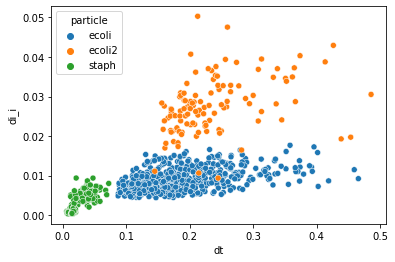

In [281]:
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='particle')

# KMeans

In [282]:
from sklearn.cluster import KMeans

In [283]:
kmeans = KMeans(n_clusters=3,random_state=42).fit(x)

In [284]:
y_pred = kmeans.labels_

In [285]:
from sklearn.metrics import accuracy_score

In [286]:
acc = accuracy_score(y,y_pred)
print(acc)

0.5473568281938326


In [287]:
df2_filt['y_pred_kmeans'] = y_pred

<AxesSubplot:xlabel='dt', ylabel='di_i'>

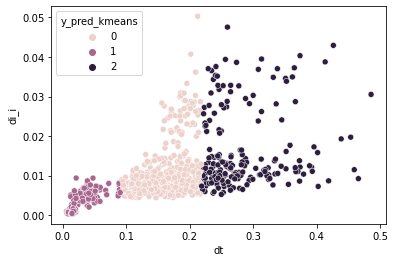

In [288]:
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_kmeans')

# GMM

In [289]:
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

<AxesSubplot:xlabel='dt', ylabel='di_i'>

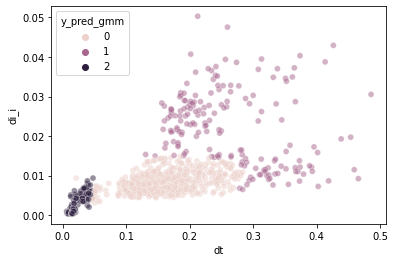

In [290]:
gmm = GaussianMixture(n_components=3,random_state=42,covariance_type='full',max_iter=10000,tol=10**-4).fit(x)
y_pred_gmm = gmm.predict(x)
df2_filt['y_pred_gmm'] = np.choose(y_pred_gmm,[0,2,1]).astype(np.int64)
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_gmm',alpha=0.5)

In [291]:
print(accuracy_score(y,df2_filt['y_pred_gmm']))

0.9008810572687225


# Bayesian GMM

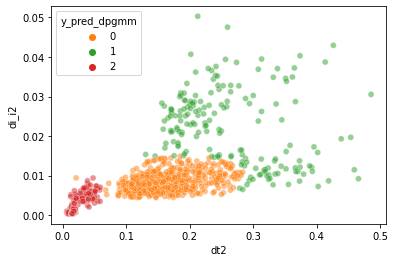

In [262]:
palette = [matplotlib.colors.hex2color('#ff7f0e'),matplotlib.colors.hex2color('#2ca02c'),matplotlib.colors.hex2color('#d62728')]
dpgmm = BayesianGaussianMixture(n_components=3,random_state=42,covariance_type='full',max_iter=1000,tol=10**-4).fit(x)
y_pred_dpgmm = dpgmm.predict(x)
df2_filt['y_pred_dpgmm'] = np.choose(y_pred_dpgmm,[0,2,1]).astype(np.int64)
sns.scatterplot(data=df2_filt,x='dt2',y='di_i2',hue='y_pred_dpgmm',alpha=0.5,palette=palette)
plt.show()

In [263]:
print(accuracy_score(y,df2_filt['y_pred_dpgmm']))

0.920704845814978


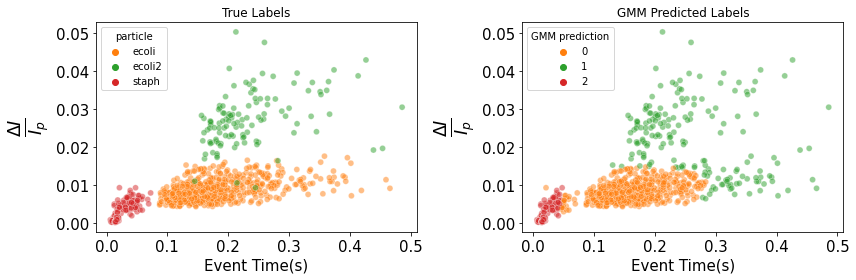

In [264]:
palette = [matplotlib.colors.hex2color('#ff7f0e'),matplotlib.colors.hex2color('#2ca02c'),matplotlib.colors.hex2color('#d62728')]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='particle',alpha=0.5,ax=ax1,palette=palette)
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_gmm',alpha=0.5,ax=ax2,palette=palette)

ax1.set_xlabel('Event Time(s)',size=15)
ax1.set_ylabel(r'$\frac{\Delta I}{I_p}$',size=25)
ax1.set_title('True Labels')
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2.set_title('GMM Predicted Labels')
ax2.set_xlabel('Event Time(s)',size=15)
ax2.set_ylabel(r'$\frac{\Delta I}{I_p}$',size=25)
ax2.legend(title='GMM prediction')
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig('E:/bacteria_data/figures/ngmm_compare.png',dpi=300)
plt.show()

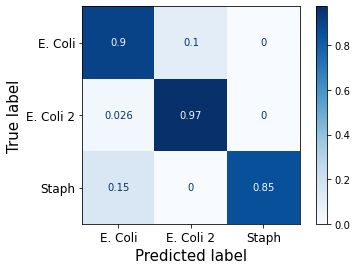

In [265]:
ConfusionMatrixDisplay.from_predictions(y,df2_filt['y_pred_gmm'],cmap='Blues',normalize='true')
plt.xticks([0,1,2],labels=['E. Coli','E. Coli 2','Staph'],size=12)
plt.yticks([0,1,2],labels=['E. Coli','E. Coli 2','Staph'],size=12)
plt.ylabel('True label',size=15)
plt.xlabel('Predicted label',size=15)

plt.savefig('E:/bacteria_data/figures/ngmm_cm.png',dpi=300)
plt.show()

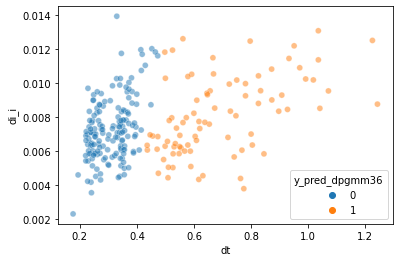

In [125]:
dpgmm36 = BayesianGaussianMixture(n_components=2,random_state=42,covariance_type='full').fit(x36)
y_pred_dpgmm36 = dpgmm36.predict(x36)
df36_filt['y_pred_dpgmm36'] = np.choose(y_pred_dpgmm36,[0,1]).astype(np.int64)
sns.scatterplot(data=df36_filt,x='dt',y='di_i',hue='y_pred_dpgmm36',alpha=0.5)
plt.show()

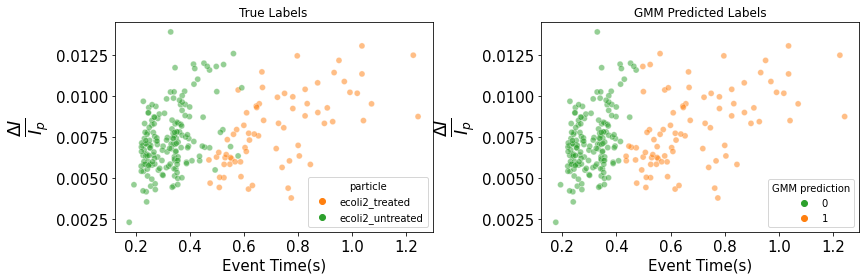

In [253]:
palette = [matplotlib.colors.hex2color('#ff7f0e'),matplotlib.colors.hex2color('#2ca02c')]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(data=df36_filt,x='dt',y='di_i',hue='particle',alpha=0.5,ax=ax1,palette=palette)
sns.scatterplot(data=df36_filt,x='dt',y='di_i',hue='y_pred_dpgmm36',alpha=0.5,ax=ax2,palette=palette[::-1])

ax1.set_xlabel('Event Time(s)',size=15)
ax1.set_ylabel(r'$\frac{\Delta I}{I_p}$',size=25)
ax1.set_title('True Labels')
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2.set_title('GMM Predicted Labels')
ax2.set_xlabel('Event Time(s)',size=15)
ax2.set_ylabel(r'$\frac{\Delta I}{I_p}$',size=25)
ax2.legend(title='GMM prediction')
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig('E:/bacteria_data/figures/gmm_compare36.png',dpi=300)
plt.show()

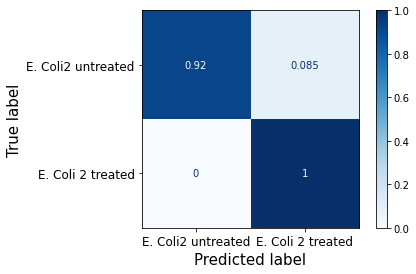

In [254]:
ConfusionMatrixDisplay.from_predictions(y36,df36_filt['y_pred_dpgmm36'],cmap='Blues',normalize='true')
plt.xticks([0,1],labels=['E. Coli2 untreated','E. Coli 2 treated'],size=12)
plt.yticks([0,1],labels=['E. Coli2 untreated','E. Coli 2 treated'],size=12)
plt.ylabel('True label',size=15)
plt.xlabel('Predicted label',size=15)

plt.savefig('E:/bacteria_data/figures/gmm_cm36.png',dpi=300)
plt.show()

# DTW DBA

In [301]:
from tslearn.utils import to_time_series,to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.barycenters import softdtw_barycenter
from tslearn.preprocessing import TimeSeriesResampler,TimeSeriesScalerMeanVariance

In [302]:
df2_filt.columns

Index(['index', 't0', 't1', 'baseline', 'dt', 'di', 'di_i', 'vel', 'baseline2',
       'dt2', 'di2', 'di_i2', 'vel2', 'args', 'i', 'i_clean', 't', 'i2',
       'i_clean2', 't2', 'voltage', 'particle', 'pore', 'run', 'date', 'dir',
       'y_pred_kmeans', 'y_pred_gmm', 'y_pred_km_sdtw_const'],
      dtype='object')

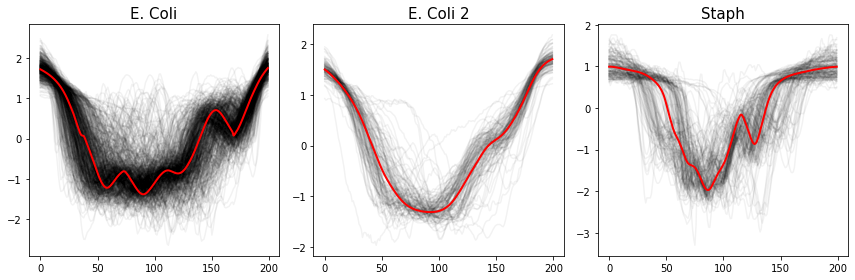

In [261]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
names = ['E. Coli','E. Coli 2','Staph']
for i,bacteria in enumerate(['ecoli','ecoli2','staph']):
    
    temp_df = df2_filt[df2_filt.particle==bacteria]
    iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
    iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
    i_format1 = to_time_series_dataset(iclean2)
    i_format1 = TimeSeriesScalerMeanVariance().fit_transform(i_format1)
    i_format1 = TimeSeriesResampler(sz=200).fit_transform(i_format1)
    average = softdtw_barycenter(i_format1,gamma=1,max_iter=50,tol=1e-3)
    
    for series in i_format1:
        ax[i].plot(series.ravel(),'k-',alpha=.05)
        
    ax[i].plot(average.ravel(),'r-',linewidth=2)
    ax[i].set_title(names[i],size=15)
plt.tight_layout()
plt.savefig('E://bacteria_data/figures/sdtw_bary.png',dpi=300)

In [29]:
temp_df = df2_filt[df2_filt.particle=='ecoli']
iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
i_format1 = to_time_series_dataset(iclean2)
i_format1 = TimeSeriesScalerMeanVariance().fit_transform(i_format1)
i_format1 = TimeSeriesResampler(sz=200).fit_transform(i_format1)

In [30]:
average_ecoli = softdtw_barycenter(i_format1,gamma=1,max_iter=50,tol=1e-3)

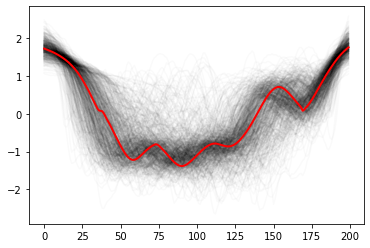

In [31]:
for series in i_format1:
    plt.plot(series.ravel(),'k-',alpha=.02)
plt.plot(average_ecoli.ravel(),'r-',linewidth=2)
plt.show()

In [32]:
temp_df = df2_filt[df2_filt.particle=='ecoli2']
iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
i_format2 = to_time_series_dataset(iclean2)
i_format2 = TimeSeriesScalerMeanVariance().fit_transform(i_format2)
i_format2 = TimeSeriesResampler(sz=200).fit_transform(i_format2)

In [33]:
average_ecoli2 = softdtw_barycenter(i_format2,gamma=1,max_iter=50,tol=1e-3)

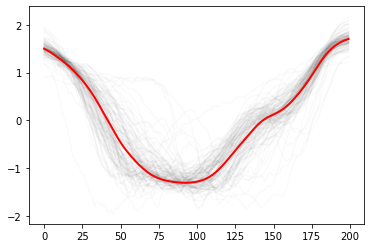

In [34]:
for series in i_format2:
    plt.plot(series.ravel(),'k-',alpha=.02)
plt.plot(average_ecoli2.ravel(),'r-',linewidth=2)
plt.show()

In [35]:
temp_df = df2_filt[df2_filt.particle=='staph']
iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
i_format3 = to_time_series_dataset(iclean2)
i_format3 = TimeSeriesScalerMeanVariance().fit_transform(i_format3)
i_format3 = TimeSeriesResampler(sz=200).fit_transform(i_format3)

In [36]:
average_staph = softdtw_barycenter(i_format3,gamma=1,max_iter=50,tol=1e-3)

In [60]:
i_format3[0] = TimeSeriesResampler(sz=250).fit_transform(i_format3[0].reshape(1,200,1))

ValueError: could not broadcast input array from shape (250,1) into shape (200,1)

In [79]:
temp_df = df2_filt[df2_filt.particle=='staph']
iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
i_format3 = to_time_series_dataset(iclean2)
i_format3 = TimeSeriesScalerMeanVariance().fit_transform(i_format3)


list_len = [len(i) for i in iclean2]
mx = max(list_len)//10
a = np.empty((len(i_format3),mx,1))
a[:] = np.nan            
for i,series in enumerate(i_format3):
    
    n = len(series)
    n_r = n//10
    trans = TimeSeriesResampler(sz=n_r).fit_transform(series.reshape(1,n,1))
    a[i][:n_r] = trans.reshape(n_r,1)

In [81]:
a.shape

(150, 72, 1)

In [82]:
average_staph = softdtw_barycenter(a,gamma=1,max_iter=50,tol=1e-3)

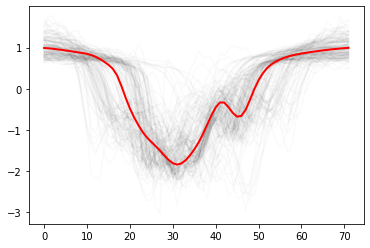

In [83]:
for series in a:
    plt.plot(series.ravel(),'k-',alpha=.02)
plt.plot(average_staph.ravel(),'r-',linewidth=2)
plt.show()

# KMeans DBA cluster

In [165]:
temp_df = df2_filt
iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
i_format4 = to_time_series_dataset(iclean2)
i_format4 = TimeSeriesScalerMeanVariance().fit_transform(i_format4)
i_format4 = TimeSeriesResampler(sz=200).fit_transform(i_format4)

In [84]:
# temp_df = df2_filt
# iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
# iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
# i_format3 = to_time_series_dataset(iclean2)
# i_format3 = TimeSeriesScalerMeanVariance().fit_transform(i_format3)


# list_len = [len(i) for i in iclean2]
# mx = max(list_len)//10
# a = np.empty((len(i_format3),mx,1))
# a[:] = np.nan            
# for i,series in enumerate(i_format3):
    
#     n = len(series)
#     n_r = n//10
#     trans = TimeSeriesResampler(sz=n_r).fit_transform(series.reshape(1,n,1))
#     a[i][:n_r] = trans.reshape(n_r,1)

In [166]:
dtw_kmeans = TimeSeriesKMeans(n_clusters=3,metric='softdtw',max_iter=20,random_state=42)
dtw_kmeans.fit(i_format4)

TimeSeriesKMeans(max_iter=20, metric='softdtw', random_state=42)

In [167]:
with open('E:/bacteria_data/models/sdtw_km_fast_ecoli.pkl','wb') as f:
    pickle.dump(dtw_kmeans,f)

In [128]:
with open('E:/bacteria_data/models/sdtw_km.pkl', 'rb') as f:
    test = pickle.load(f)

In [269]:
y_pred = dtw_kmeans.predict(i_format4)

In [270]:
df2_filt['y_pred_km_sdtw'] = y_pred
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_km_sdtw',alpha=0.5)

ValueError: Length of values (549) does not match length of index (908)

In [170]:
df2_filt['y_pred_km_sdtw']= np.choose(y_pred,[0,1,2]).astype(np.int64)
centers = [dtw_kmeans.cluster_centers_[2].ravel(),dtw_kmeans.cluster_centers_[1].ravel(),dtw_kmeans.cluster_centers_[0].ravel()]

<AxesSubplot:xlabel='dt2', ylabel='di_i2'>

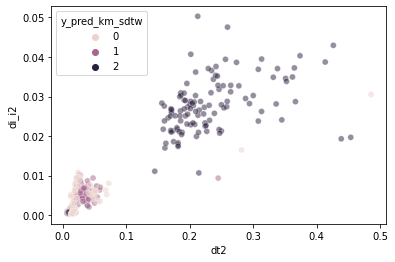

In [171]:
sns.scatterplot(data=df2_filt,x='dt2',y='di_i2',hue='y_pred_km_sdtw',alpha=0.5)

# Determine Labels and Plotting

In [136]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

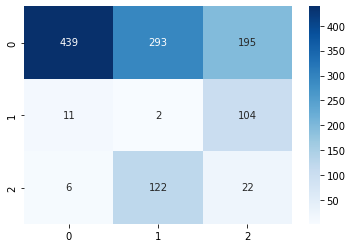

In [137]:
cm = confusion_matrix(y,df2_filt.y_pred_km_sdtw)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()

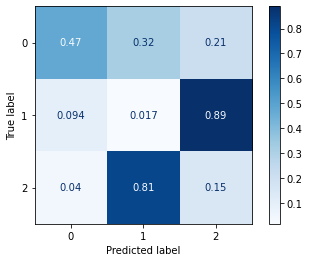

In [138]:
ConfusionMatrixDisplay.from_predictions(y,df2_filt['y_pred_km_sdtw'],cmap='Blues',normalize='true')
plt.show()

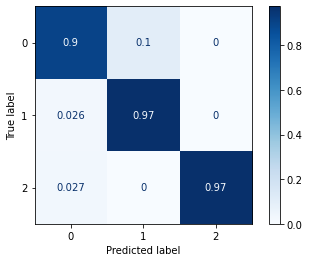

In [141]:
ConfusionMatrixDisplay.from_predictions(y,df2_filt['y_pred_dpgmm'],cmap='Blues',normalize='true')
plt.show()

In [139]:
print(accuracy_score(y,df2_filt['y_pred_km_sdtw']))

0.3877721943048576


In [143]:
df2_filt.columns

Index(['index', 't0', 't1', 'baseline', 'dt', 'di', 'di_i', 'vel', 'baseline2',
       'dt2', 'di2', 'di_i2', 'vel2', 'args', 'i', 'i_clean', 't', 'i2',
       'i_clean2', 't2', 'voltage', 'particle', 'pore', 'run', 'date', 'dir',
       'y_pred_km_sdtw', 'y_pred_dpgmm'],
      dtype='object')

<AxesSubplot:xlabel='di_i2', ylabel='Density'>

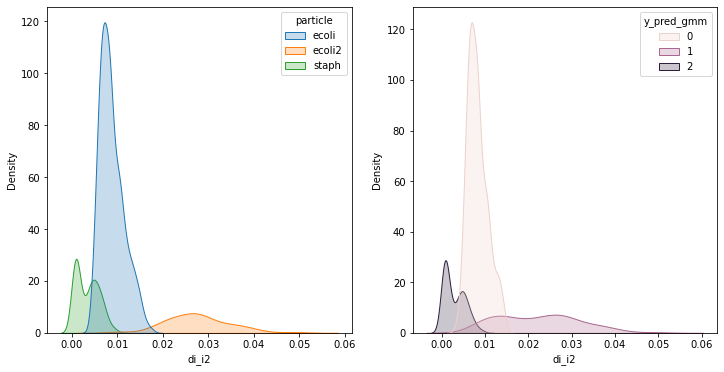

In [266]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
sns.kdeplot(data=df2_filt,x='di_i2',hue='particle',fill=True,ax=ax1)
sns.kdeplot(data=df2_filt,x='di_i2',hue='y_pred_gmm',fill=True,ax=ax2)

<AxesSubplot:xlabel='dt2', ylabel='Density'>

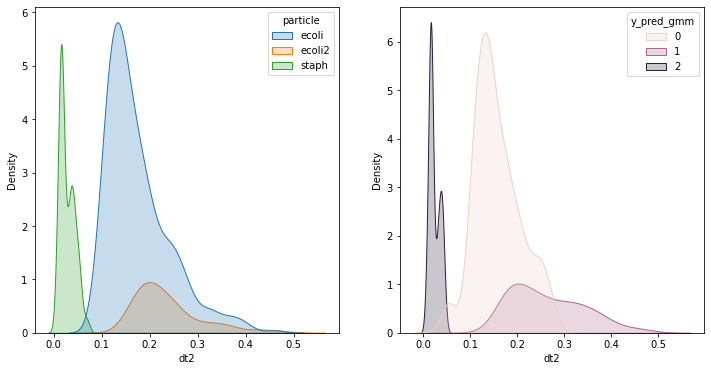

In [267]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
sns.kdeplot(data=df2_filt,x='dt2',hue='particle',fill=True,ax=ax1)
sns.kdeplot(data=df2_filt,x='dt2',hue='y_pred_gmm',fill=True,ax=ax2)

In [112]:
for yi in range(3):
    plt.subplot(3, 3, yi)
    for xx in a[df2_filt['y_pred_km_sdtw'] == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.02)
    plt.plot(centers[yi], "r-")
    
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

ValueError: num must be 1 <= num <= 9, not 0

<Figure size 432x288 with 0 Axes>

# DBA Cluster - constant width

In [294]:
temp_df = df2_filt
iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
i_format4 = to_time_series_dataset(iclean2)
i_format4 = TimeSeriesScalerMeanVariance().fit_transform(i_format4)
i_format4 = TimeSeriesResampler(sz=200).fit_transform(i_format4)

In [295]:
dtw_kmeans_const = TimeSeriesKMeans(n_clusters=3,metric='dtw',max_iter=20,random_state=42)
dtw_kmeans_const.fit(i_format4)

TimeSeriesKMeans(max_iter=20, metric='dtw', random_state=42)

In [299]:
y_sdtw_const = dtw_kmeans_const.predict(i_format4)

<AxesSubplot:xlabel='dt', ylabel='di_i'>

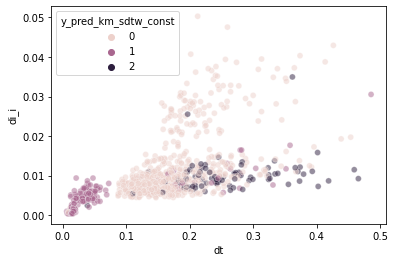

In [300]:
df2_filt['y_pred_km_sdtw_const'] = y_sdtw_const
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_km_sdtw_const',alpha=0.5)

In [298]:
len(y_dtw_const)

908

<AxesSubplot:xlabel='dt', ylabel='di_i'>

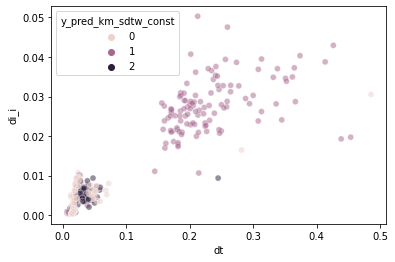

In [228]:
df2_filt['y_pred_km_sdtw_const']= np.choose(y_sdtw_const,[0,2,1]).astype(np.int64)
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_km_sdtw_const',alpha=0.5)

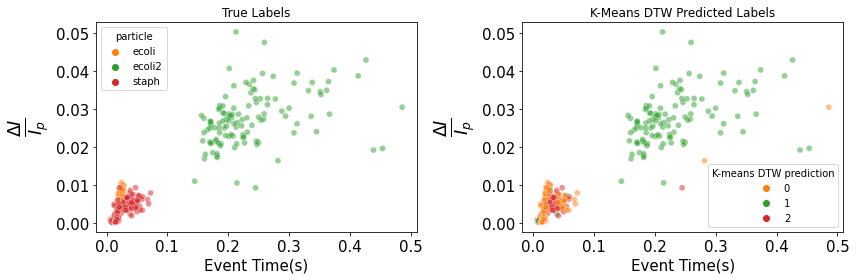

In [234]:
palette = [matplotlib.colors.hex2color('#ff7f0e'),matplotlib.colors.hex2color('#2ca02c'),matplotlib.colors.hex2color('#d62728')]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='particle',alpha=0.5,ax=ax1,palette=palette)
sns.scatterplot(data=df2_filt,x='dt',y='di_i',hue='y_pred_km_sdtw_const',alpha=0.5,ax=ax2,palette=palette)

ax1.set_xlabel('Event Time(s)',size=15)
ax1.set_ylabel(r'$\frac{\Delta I}{I_p}$',size=25)
ax1.set_title('True Labels')
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2.set_title('K-Means DTW Predicted Labels')
ax2.set_xlabel('Event Time(s)',size=15)
ax2.set_ylabel(r'$\frac{\Delta I}{I_p}$',size=25)
ax2.legend(title='K-means DTW prediction')
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig('E:/bacteria_data/figures/kmdtw_compare_fast_ecoli.png',dpi=300)
plt.show()

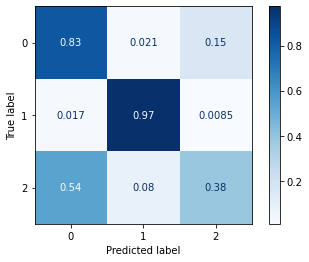

In [179]:
ConfusionMatrixDisplay.from_predictions(y,df2_filt['y_pred_km_sdtw_const'],cmap='Blues',normalize='true')
plt.show()

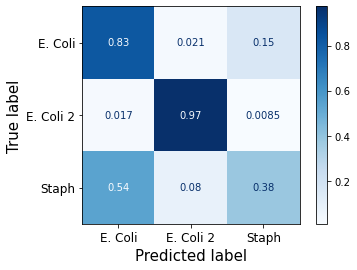

In [235]:
ConfusionMatrixDisplay.from_predictions(y,df2_filt['y_pred_km_sdtw_const'],cmap='Blues',normalize='true')
plt.xticks([0,1,2],labels=['E. Coli','E. Coli 2','Staph'],size=12)
plt.yticks([0,1,2],labels=['E. Coli','E. Coli 2','Staph'],size=12)
plt.ylabel('True label',size=15)
plt.xlabel('Predicted label',size=15)

plt.savefig('E:/bacteria_data/figures/kmdtw_cm_fast_ecoli.png',dpi=300)
plt.show()

# Treated DTW

In [262]:
temp_df = df36_filt
iclean2 = temp_df.apply(lambda x: x.i_clean2[::x.dir],axis=1)
iclean2 = iclean2.apply(np.ndarray.tolist).to_list()
i_format4 = to_time_series_dataset(iclean2)
i_format4 = TimeSeriesScalerMeanVariance().fit_transform(i_format4)
i_format4 = TimeSeriesResampler(sz=200).fit_transform(i_format4)

In [263]:
dtw_kmeans_const36 = TimeSeriesKMeans(n_clusters=2,metric='softdtw',max_iter=20,random_state=42)
dtw_kmeans_const36.fit(i_format4)

TimeSeriesKMeans(max_iter=20, metric='softdtw', n_clusters=2, random_state=42)

In [264]:
y_sdtw_const36 = dtw_kmeans_const36.predict(i_format4)

<AxesSubplot:xlabel='dt', ylabel='di_i'>

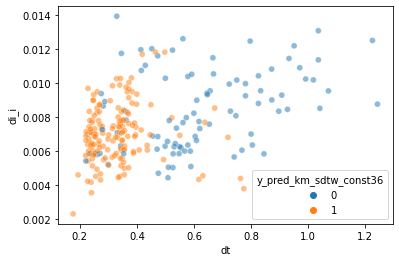

In [265]:
df36_filt['y_pred_km_sdtw_const36'] = y_sdtw_const36
sns.scatterplot(data=df36_filt,x='dt',y='di_i',hue='y_pred_km_sdtw_const36',alpha=0.5)

<AxesSubplot:xlabel='dt', ylabel='di_i'>

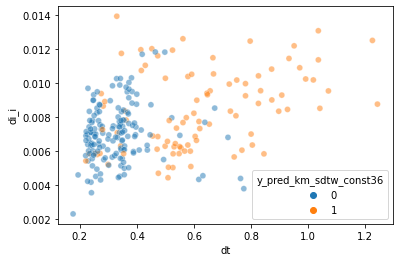

In [267]:
df36_filt['y_pred_km_sdtw_const36']= np.choose(y_sdtw_const36,[1,0]).astype(np.int64)
sns.scatterplot(data=df36_filt,x='dt',y='di_i',hue='y_pred_km_sdtw_const36',alpha=0.5)

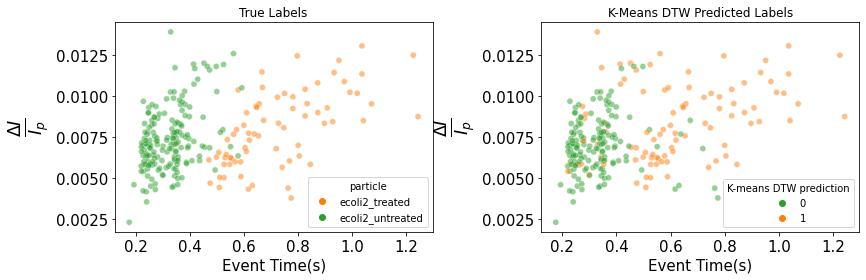

In [269]:
palette = [matplotlib.colors.hex2color('#ff7f0e'),matplotlib.colors.hex2color('#2ca02c')]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(data=df36_filt,x='dt',y='di_i',hue='particle',alpha=0.5,ax=ax1,palette=palette)
sns.scatterplot(data=df36_filt,x='dt',y='di_i',hue='y_pred_km_sdtw_const36',alpha=0.5,ax=ax2,palette=palette[::-1])

ax1.set_xlabel('Event Time(s)',size=15)
ax1.set_ylabel(r'$\frac{\Delta I}{I_p}$',size=25)
ax1.set_title('True Labels')
ax1.tick_params(axis='both', which='major', labelsize=15)

ax2.set_title('K-Means DTW Predicted Labels')
ax2.set_xlabel('Event Time(s)',size=15)
ax2.set_ylabel(r'$\frac{\Delta I}{I_p}$',size=25)
ax2.legend(title='K-means DTW prediction')
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.savefig('E:/bacteria_data/figures/kmdtw_compare36.png',dpi=300)
plt.show()

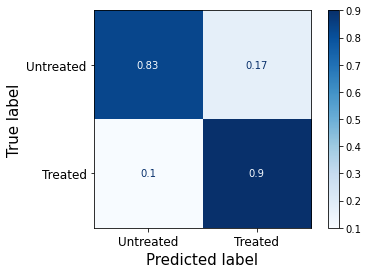

In [270]:
ConfusionMatrixDisplay.from_predictions(y36,df36_filt['y_pred_km_sdtw_const36'],cmap='Blues',normalize='true')
plt.xticks([0,1],labels=['Untreated','Treated'],size=12)
plt.yticks([0,1],labels=['Untreated','Treated'],size=12)
plt.ylabel('True label',size=15)
plt.xlabel('Predicted label',size=15)
plt.tight_layout()
plt.savefig('E:/bacteria_data/figures/kmdtw_cm36.png',dpi=300)
plt.show()